In [1]:
# Import relevant modules and functions
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Local imports
sys.path.append("/workspaces/MTMA33_Computing/scripts")
from practical_3_functions import read_in_data, extract_month, calibrate_data


In [3]:
# Use np.genfromtxt to read in the data from the file
lusaka_data = np.genfromtxt('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt')

In [4]:
# Set up testdata
# this generates a random sample of 10 values from a normal distribution with mean 5 and standard deviation 10
testdata = np.random.normal(5, 5, 10)
print(testdata)

[ 8.95430141 -0.9251166   7.64892304  4.02783336 -5.45265436  6.70672107
  1.29100785  5.9015518   5.00144341  7.63968687]


In [5]:
# Write a function mymean() which takes as its only input argument 
# and returns the mean of the data as the output
# not allowed to use np.mean() or np.average() in the function
def mymean(data):
    # calculate the mean of the data
    # store the result in a variable called mean
    len_data = len(data)
    sum_data = 0

    # Loop over the data and calculate the sum
    for i in range(len_data):
        sum_data += data[i]

    mean = sum_data / len_data

    return mean

In [6]:
# Test the function mymean() on the testdata
print(mymean(testdata))
print(np.mean(testdata))

4.079369784875972
4.079369784875972


In [7]:
# Use the functions in practical_3_functions.py
# to write a new function make_monthly_calibration()
# which produces a new calibration based on the data for lusaka_data
# this fuction returns the coefficients of the calibration: a0 and a1
# and takes as input all the years of data, for only one month
# where the month can be specified as an input argument
# the data files luaska_data has four columns:
# year, month, CCD (hours), total monthly rainfall (mm)
def make_monthly_calibration(data_path, month):
    """
    Function to calculate the calibration coefficients for a given month.

    For the lusaaka_data, the columns are:
    year, month, CCD (hours), total monthly rainfall (mm).

    Inputs:

    data_path = path to the data file (string)
    month = integer value for the month of interest (1-12)

    Outputs:

    a0 = calibration coefficient a0 (float)
    a1 = calibration coefficient a1 (float)
    
    """

    # Use the function read_in_data() to read in the data
    input_data = read_in_data(data_path)

    # Use the function extract_month() to extract the data for the month of interest
    month_data = extract_month(input_data, month)

    # Use the function calibrate_data() to calculate the calibration coefficients
    a0, a1 = calibrate_data(month_data)

    return a0, a1

In [8]:
# Test the function make_monthly_calibration()
# for the month of January (month = 1)
a0, a1 = make_monthly_calibration('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', 1)

# Print the calibration coefficients
print(a0, a1)

75.82072597313831 0.4650546881575167


In [9]:
# Test the function make_monthly_calibration() for the month of December (month = 12)
a0, a1 = make_monthly_calibration('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', 12)

# Print the calibration coefficients
print(a0, a1)

87.19024196168046 1.1579334898825928


In [10]:
# Write a second function to derive a multi-annual time series of rainfall estimates
# for a given month, using the calibration coefficients
# Equation: rainfall = a0 + a1 * CCD
def calculate_monthly_rainfall(data_path, month):
    """
    Function to calculate the monthly rainfall for a given month.

    For the lusaaka_data, the columns are:
    year, month, CCD (hours), total monthly rainfall (mm).

    Inputs:

    data_path = path to the data file (string)
    month = integer value for the month of interest (1-12)

    Outputs:

    rainfall = monthly rainfall (float)
    
    """

    # Use the function make_monthly_calibration() to calculate the calibration coefficients
    a0, a1 = make_monthly_calibration(data_path, month)

    # Use the function read_in_data() to read in the data
    input_data = read_in_data(data_path)

    # Use the function extract_month() to extract the data for the month of interest
    month_data = extract_month(input_data, month)

    # Calculate the monthly rainfall using the calibration coefficients
    rainfall = a0 + a1 * month_data[:, 2]

    return rainfall

In [11]:
# Test the function calculate_monthly_rainfall()
# for the month of January (month = 1)
rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', 1)

# Print the monthly rainfall
print(rainfall)

# Test the function calculate_monthly_rainfall()
# for the month of December (month = 12)
rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', 12)

# Print the monthly rainfall
print(rainfall)

# Test the function calculate_monthly_rainfall()
# for the month of July (month = 7)
rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', 7)

# Print the monthly rainfall
print(rainfall)

[319.50938257 233.35800159 149.35749854 210.10526718 158.94925148
 178.71407573 258.64535026 315.61454955 277.24753778 256.08754947
 227.83547716 167.3783677  151.97343116 188.30582867 251.66952993
 188.30582867 273.75962762 220.27833848 226.78910412 217.77866953
 212.54680429 251.7857936  179.00473491]
[136.40241528 168.24558625 213.11550899 123.37566352 197.91763193
 209.49696683 156.66625135 213.11550899 229.03709447 166.07446096
 179.82492115 195.74650664 137.12612371 181.99604645 281.86780995
 247.12980525 189.95683919 324.85609076 262.61716568 155.21883449
 196.47021507 159.56108508 218.181468  ]
[ 1.17313916  1.17313916  1.17313916  1.17313916  1.17313916  1.17313916
  1.17313916  1.17313916  1.17313916  1.17313916  1.17313916  1.17313916
  0.60679612  1.17313916  1.17313916  1.17313916  1.17313916 -0.24271845
  1.17313916  1.17313916  1.17313916  1.17313916  1.17313916]


In [12]:
# Create a function to extract the observed rainfall for a given month
def extract_monthly_rainfall(data_path, month):
    """
    Function to extract the monthly rainfall for a given month.

    For the lusaaka_data, the columns are:
    year, month, CCD (hours), total monthly rainfall (mm).

    Inputs:

    data_path = path to the data file (string)
    month = integer value for the month of interest (1-12)

    Outputs:

    rainfall = monthly rainfall (float)
    
    """

    # Use the function read_in_data() to read in the data
    input_data = read_in_data(data_path)

    # Use the function extract_month() to extract the data for the month of interest
    month_data = extract_month(input_data, month)

    # Extract the monthly rainfall
    rainfall = month_data[:, 3]

    return rainfall

/tmp/ipykernel_3187/3702639271.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(winter_model_rainfall, hist=False, label='Estimated rainfall')
/tmp/ipykernel_3187/3702639271.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(winter_obs_rainfall, hist=False, label='Observe

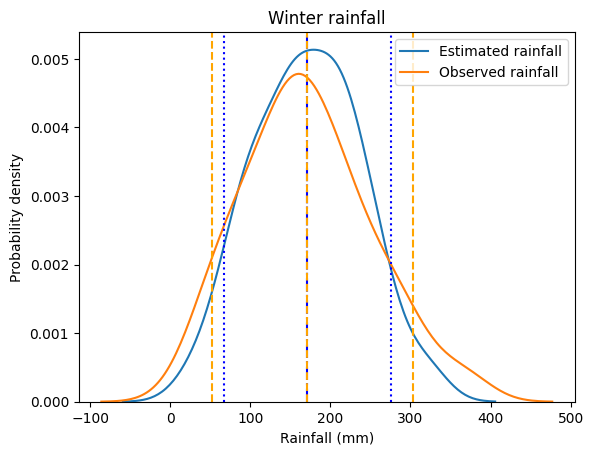

In [31]:
# How well do the rainfall estimates compare with the observed rainfall?
# Loop over the winter months (dec, jan, feb, mar) and calculate the monthly rainfall
winter_months = [12, 1, 2, 3]

# Create empty lists to store the model and observed rainfall
winter_model_rainfall = []
winter_obs_rainfall = []

# Loop over the winter months
for i in range(len(winter_months)):
    # Calculate the model rainfall
    model_rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', winter_months[i])

    # Calculate the observed rainfall
    obs_rainfall = extract_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', winter_months[i])

    # Append the model rainfall to the list
    winter_model_rainfall.append(model_rainfall)

    # Append the observed rainfall to the list
    winter_obs_rainfall.append(obs_rainfall)

# Concatenate the model data into a single array
winter_model_rainfall = np.concatenate(winter_model_rainfall)

# Concatenate the observed data into a single array
winter_obs_rainfall = np.concatenate(winter_obs_rainfall)

# print(winter_model_rainfall)
# print(winter_obs_rainfall)

# Plots pdfs of the observed and estimated rainfall
# for the month of July (month = 7)
sns.distplot(winter_model_rainfall, hist=False, label='Estimated rainfall')
sns.distplot(winter_obs_rainfall, hist=False, label='Observed rainfall')
# Plot the means for the model and observed rainfall
plt.axvline(np.mean(winter_model_rainfall), color='blue', linestyle='-.')
plt.axvline(np.mean(winter_obs_rainfall), color='orange', linestyle='--')
# Plot the 5 and 95 percentiles for the model and observed rainfall
plt.axvline(np.percentile(winter_model_rainfall, 5), color='blue', linestyle=':')
plt.axvline(np.percentile(winter_model_rainfall, 95), color='blue', linestyle=':')
plt.axvline(np.percentile(winter_obs_rainfall, 5), color='orange', linestyle='--')
plt.axvline(np.percentile(winter_obs_rainfall, 95), color='orange', linestyle='--')

plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability density')
plt.title('Winter rainfall')
plt.legend()
plt.show()


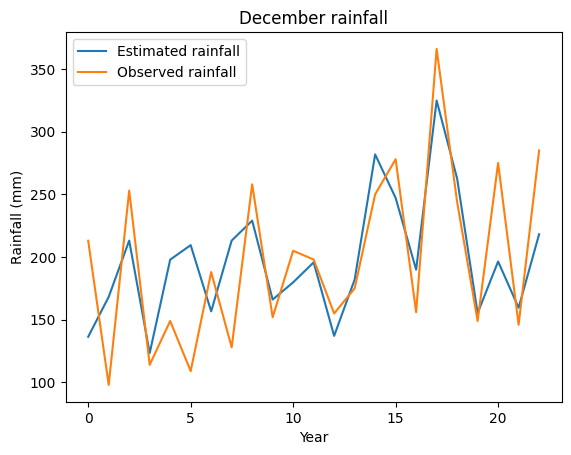

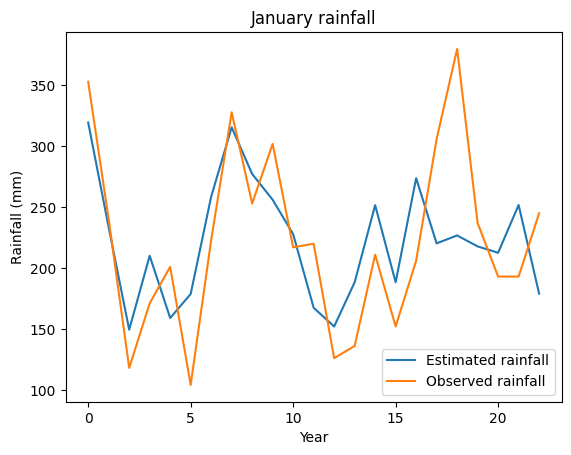

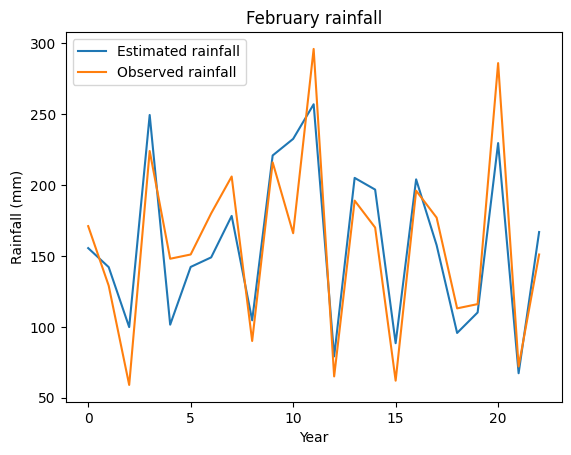

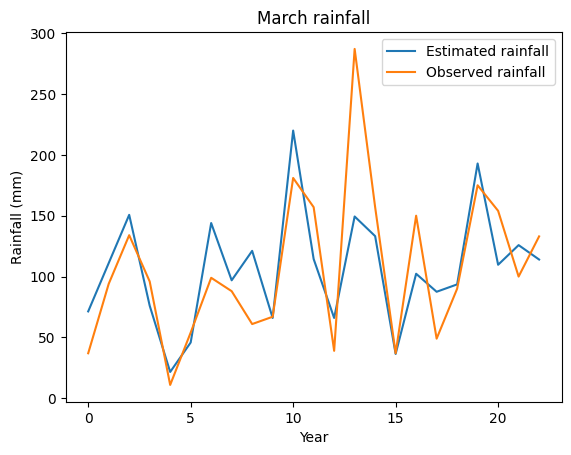

In [34]:
# Plot time series of the observed and estimated rainfall
# for each of the winter months
# Loop over the winter months
winter_month_names = ['December', 'January', 'February', 'March']

for i in range(len(winter_months)):
    # Calculate the model rainfall
    model_rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', winter_months[i])

    # Calculate the observed rainfall
    obs_rainfall = extract_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', winter_months[i])

    # Plot the model rainfall
    plt.plot(model_rainfall, label='Estimated rainfall')

    # Plot the observed rainfall
    plt.plot(obs_rainfall, label='Observed rainfall')

    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.title(winter_month_names[i] + ' rainfall')
    plt.legend()
    plt.show()

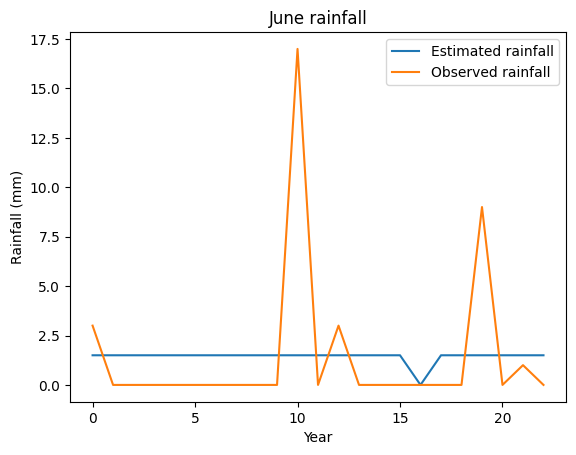

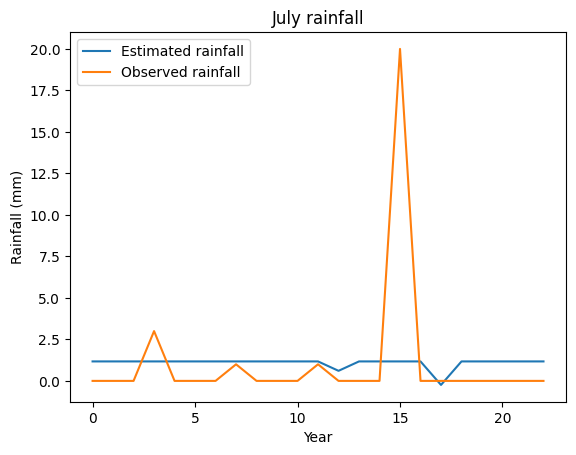

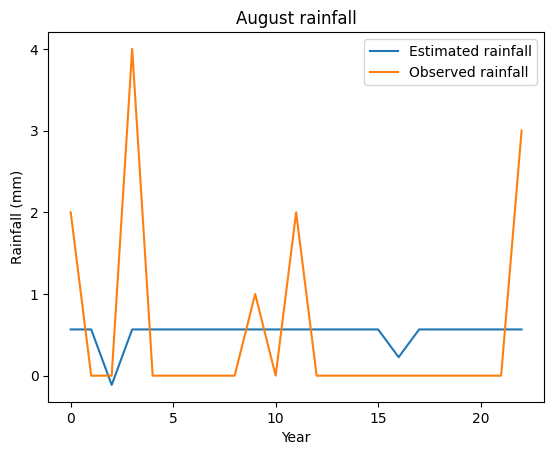

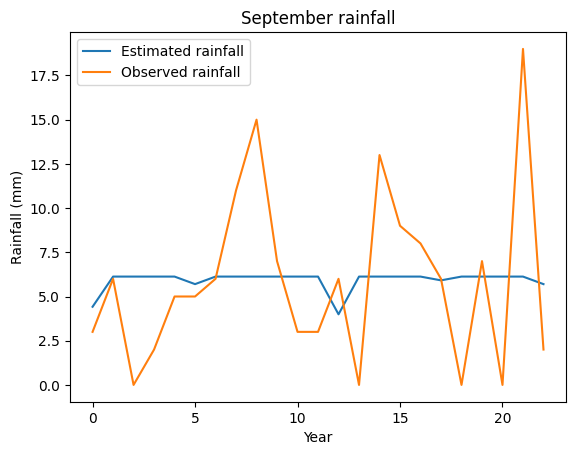

In [35]:
# Do the same for the summer months (jun, jul, aug, sep)
summer_months = [6, 7, 8, 9]
summer_month_names = ['June', 'July', 'August', 'September']

for i in range(len(summer_months)):
    # Calculate the model rainfall
    model_rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', summer_months[i])

    # Calculate the observed rainfall
    obs_rainfall = extract_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', summer_months[i])

    # Plot the model rainfall
    plt.plot(model_rainfall, label='Estimated rainfall')

    # Plot the observed rainfall
    plt.plot(obs_rainfall, label='Observed rainfall')

    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.title(summer_month_names[i] + ' rainfall')
    plt.legend()
    plt.show()

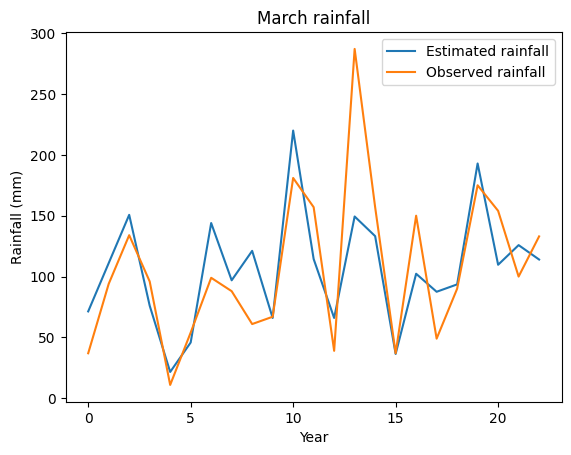

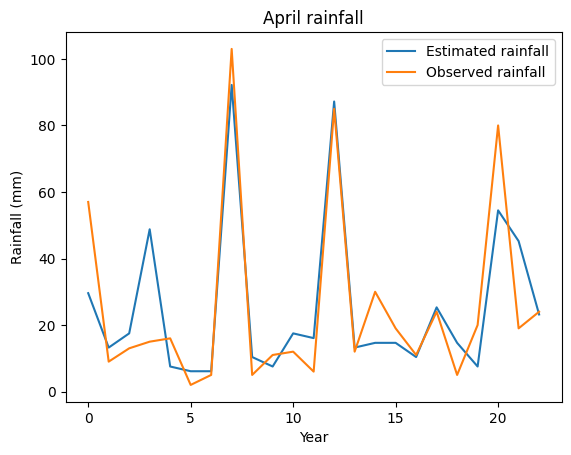

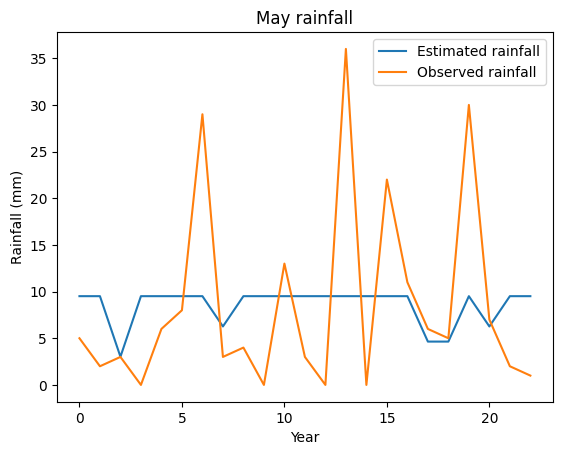

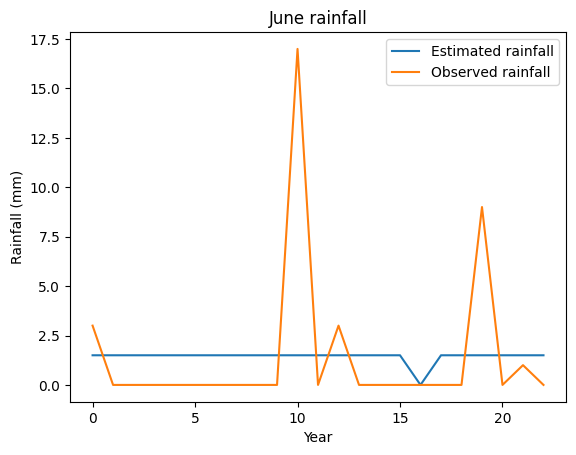

In [36]:
# Do the same but for the spring rainfall (mar, apr, may, jun)
spring_months = [3, 4, 5, 6]
spring_month_names = ['March', 'April', 'May', 'June']

for i in range(len(spring_months)):
    # Calculate the model rainfall
    model_rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', spring_months[i])

    # Calculate the observed rainfall
    obs_rainfall = extract_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', spring_months[i])

    # Plot the model rainfall
    plt.plot(model_rainfall, label='Estimated rainfall')

    # Plot the observed rainfall
    plt.plot(obs_rainfall, label='Observed rainfall')

    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.title(spring_month_names[i] + ' rainfall')
    plt.legend()
    plt.show()

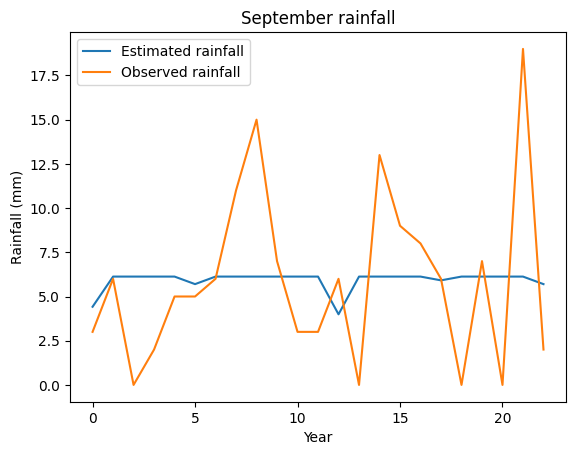

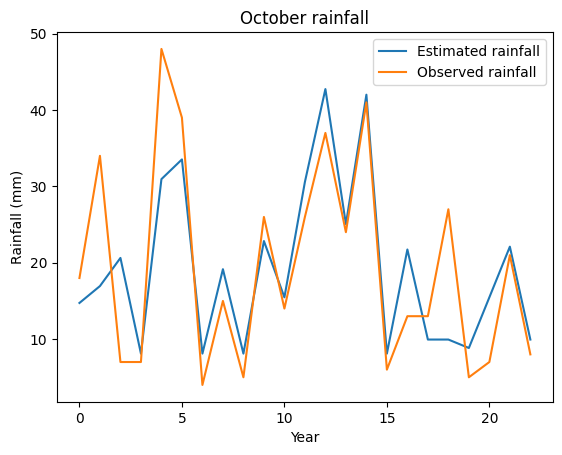

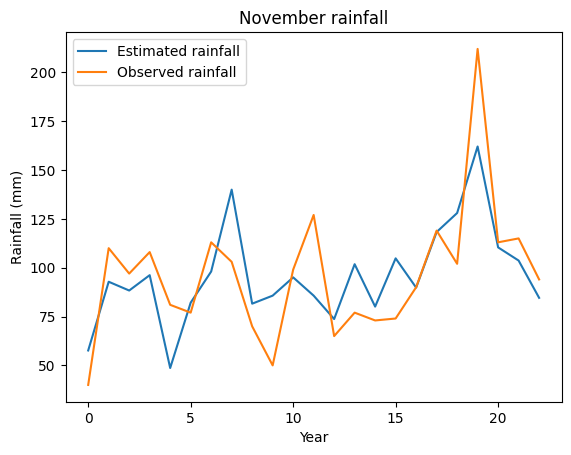

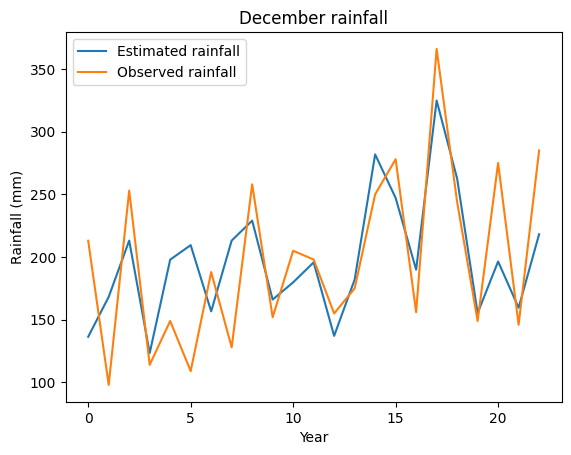

In [37]:
# Do the same but for the autumn rainfall (sep, oct, nov, dec)
autumn_months = [9, 10, 11, 12]
autumn_month_names = ['September', 'October', 'November', 'December']

for i in range(len(autumn_months)):
    # Calculate the model rainfall
    model_rainfall = calculate_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', autumn_months[i])

    # Calculate the observed rainfall
    obs_rainfall = extract_monthly_rainfall('/workspaces/MTMA33_Computing/data/lusaka_ccd_gauge.txt', autumn_months[i])

    # Plot the model rainfall
    plt.plot(model_rainfall, label='Estimated rainfall')

    # Plot the observed rainfall
    plt.plot(obs_rainfall, label='Observed rainfall')

    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.title(autumn_month_names[i] + ' rainfall')
    plt.legend()
    plt.show()